In [1]:
import os

import torch

from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

from matplotlib import pyplot as plt

import numpy as np
import seaborn as sns

In [2]:
medical_classes = [
    "polyp",
    "no polyp", # only for bkai
    "foot ulcer",
    "skin melanoma",
    "No tumor in the breast ultrasound image",
    "Tumor in the breast ultrasound image",
    "Left atrium cavity in the cardiac ultrasound",
    "Left atrium cavity of the heart",
    "Left ventricular cavity in the cardiac ultrasound",
    "Left ventricular cavity of the heart",
    "Myocardium in the cardiac ultrasound",
    "Myocardium of the heart",
    "Airspace Opacity in a chest Xray",
    "Atelectasis in a chest Xray",
    "Cardiomegaly in a chest Xray",
    "Consolidation in a chest Xray",
    "Edema in a chest Xray",
    "Enlarged Cardiomediastinum in a chest Xray",
    "Lung Lesion in a chest Xray",
    "Pleural Effusion in a chest Xray",
    "Pneumothorax in a chest Xray",
    "Support Devices in a chest Xray",
]
print(f"Using {len(medical_classes)=}")

Using len(medical_classes)=22


In [3]:
medical_datasets = [
    "Polyp",
    "Polyp",
    "Foot Ulcer",
    "Skin Melanoma",
    "Breast Ultrasound",
    "Breast Ultrasound",
    "Camus",
    "Camus",
    "Camus",
    "Camus",
    "Camus",
    "Camus",
    "X-ray",
    "X-ray",
    "X-ray",
    "X-ray",
    "X-ray",
    "X-ray",
    "X-ray",
    "X-ray",
    "X-ray",
    "X-ray",
]

unique_medical_datasets = set(medical_datasets)

print(f"Using {len(medical_datasets)=} with unique: {len(unique_medical_datasets)}")

assert len(medical_classes) == len(medical_datasets), "The number of medical classes and medical datasets should be the same"

Using len(medical_datasets)=22 with unique: 6


In [4]:
medical_dataset_indices = {}

for i, ds in enumerate(medical_datasets):
    indices = medical_dataset_indices.get(ds)

    if indices is None:
        medical_dataset_indices[ds] = [i]
    else:
        indices.append(i)

medical_dataset_indices

{'Polyp': [0, 1],
 'Foot Ulcer': [2],
 'Skin Melanoma': [3],
 'Breast Ultrasound': [4, 5],
 'Camus': [6, 7, 8, 9, 10, 11],
 'X-ray': [12, 13, 14, 15, 16, 17, 18, 19, 20, 21]}

In [5]:
compressed_medical_indices = {}

for curr_ds, indices in medical_dataset_indices.items():
    min_idx = indices[0]
    max_idx = indices[-1]

    if (max_idx - min_idx == len(indices) - 1):
        compressed_medical_indices[curr_ds] = (min_idx, max_idx+1)
compressed_medical_indices

{'Polyp': (0, 2),
 'Foot Ulcer': (2, 3),
 'Skin Melanoma': (3, 4),
 'Breast Ultrasound': (4, 6),
 'Camus': (6, 12),
 'X-ray': (12, 22)}

In [6]:
with open("phrasecut_uniq_phrases.txt") as f:
    phrasecut_phrases = f.read().splitlines()

In [7]:
len(phrasecut_phrases)

79995

In [8]:
cityscapes_phrases = os.listdir("../data/cityscapes_binarized/annotations/training")
len(cityscapes_phrases)

19

In [9]:
pascalvoc_phrases = os.listdir("../data/VOC2012_binarized/annotations/validation")
len(pascalvoc_phrases)

20

In [10]:
model_name = "openai/clip-vit-base-patch32"

In [11]:
all_phrases = [*phrasecut_phrases, *cityscapes_phrases,  *pascalvoc_phrases, *medical_classes]
len(all_phrases)

80056

In [12]:
open_domain_phrases_len = len(all_phrases) - len(medical_classes)
open_domain_phrases_len

80034

In [13]:
compressed_ds_indices = {
    "Phrasecut": (0, len(phrasecut_phrases)),
    "Cityscapes": (len(phrasecut_phrases), len(cityscapes_phrases)+ len(phrasecut_phrases)),
    "PascalVOC": (len(cityscapes_phrases)+ len(phrasecut_phrases), open_domain_phrases_len),
    **{k: (v1 + open_domain_phrases_len, v2 + open_domain_phrases_len) for k, (v1, v2)  in compressed_medical_indices.items()}
}
compressed_ds_indices

{'Phrasecut': (0, 79995),
 'Cityscapes': (79995, 80014),
 'PascalVOC': (80014, 80034),
 'Polyp': (80034, 80036),
 'Foot Ulcer': (80036, 80037),
 'Skin Melanoma': (80037, 80038),
 'Breast Ultrasound': (80038, 80040),
 'Camus': (80040, 80046),
 'X-ray': (80046, 80056)}

In [14]:
# from transformers import CLIPTokenizer

# tokenizer = CLIPTokenizer.from_pretrained(model_name)

In [15]:
# tokenized_inputs = tokenizer(medical_classes)

In [16]:
# for input_ids in tokenized_inputs["input_ids"][:20]:
#     print(tokenizer.convert_ids_to_tokens(input_ids, skip_special_tokens=True))

['poly', 'p</w>']

['no</w>', 'poly', 'p</w>']

['foot</w>', 'ul', 'cer</w>']

['skin</w>', 'melanoma</w>']

['no</w>', 'tumor</w>', 'in</w>', 'the</w>', 'breast</w>', 'ultrasound</w>', 'image</w>', '.</w>']

['tumor</w>', 'in</w>', 'the</w>', 'breast</w>', 'ultrasound</w>', 'image</w>', '.</w>']

['left</w>', 'atrium</w>', 'cavity</w>', 'in</w>', 'the</w>', 'cardiac</w>', 'ultrasound</w>', '.</w>']

['left</w>', 'atrium</w>', 'cavity</w>', 'of</w>', 'the</w>', 'heart</w>', '.</w>']

['left</w>', 'ven', 'tric', 'ular</w>', 'cavity</w>', 'in</w>', 'the</w>', 'cardiac</w>', 'ultrasound</w>', '.</w>']

['left</w>', 'ven', 'tric', 'ular</w>', 'cavity</w>', 'of</w>', 'the</w>', 'heart</w>', '.</w>']

['myo', 'car', 'dium</w>', 'in</w>', 'the</w>', 'cardiac</w>', 'ultrasound</w>', '.</w>']

['myo', 'car', 'dium</w>', 'of</w>', 'the</w>', 'heart</w>', '.</w>']

['airspace</w>', 'op', 'acity</w>', 'in</w>', 'a</w>', 'chest</w>', 'x', 'ray</w>', '.</w>']

['ate', 'lec', 'tas', 'is</w>', 'in</w>', 'a</w>', 'chest</w>', 'x', 'ray</w>', '.</w>']

['cardi', 'ome', 'gal', 'y</w>', 'in</w>', 'a</w>', 'chest</w>', 'x', 'ray</w>', '.</w>']

['consolidation</w>', 'in</w>', 'a</w>', 'chest</w>', 'x', 'ray</w>', '.</w>']

['ede', 'ma</w>', 'in</w>', 'a</w>', 'chest</w>', 'x', 'ray</w>', '.</w>']

['enlar', 'ged</w>', 'cardi', 'ome', 'di', 'ast', 'in', 'um</w>', 'in</w>', 'a</w>', 'chest</w>', 'x', 'ray</w>', '.</w>']

['lung</w>', 'le', 'sion</w>', 'in</w>', 'a</w>', 'chest</w>', 'x', 'ray</w>', '.</w>']

['ple', 'ural</w>', 'ef', 'fusion</w>', 'in</w>', 'a</w>', 'chest</w>', 'x', 'ray</w>', '.</w>']

In [17]:
# device = "cuda" if torch.cuda.is_available() else "cpu"

# print(f"Using {device=}")

In [18]:
# from transformers import CLIPTextModelWithProjection

# model = CLIPTextModelWithProjection.from_pretrained(model_name).eval().to(device)

In [19]:
# no_prefix_embeds = np.empty((len(all_phrases), model.config.hidden_size), dtype=np.float32)
# no_prefix_embeds.shape

In [20]:
# import math

# BATCH_SIZE = 128
# num_iter = math.ceil(len(all_phrases) / BATCH_SIZE)
# num_iter

In [21]:
# import gc

# torch.cuda.empty_cache()
# gc.collect()

In [22]:
# from tqdm.notebook import trange

# with torch.inference_mode():
#     for i in trange(num_iter):
#         start_idx = i * BATCH_SIZE
#         idx_range = slice(start_idx, start_idx + BATCH_SIZE)
#         tokenized_inputs = tokenizer(
#             all_phrases[idx_range],
#             return_tensors="pt",
#             truncation=True,
#             padding=True
#         ).to(device)
#         text_embeds = model(**tokenized_inputs).text_embeds.cpu().numpy()
#         no_prefix_embeds[idx_range] = text_embeds

In [23]:
# import gc

# torch.cuda.empty_cache()
# gc.collect()

In [24]:
# hand_engineered_embeds = np.empty((len(all_phrases), model.config.hidden_size), dtype=np.float32)
# hand_engineered_embeds.shape

In [25]:
# from tqdm.notebook import trange


# prefix = "a photo of a "

# with torch.inference_mode():
#     for i in trange(num_iter):
#         start_idx = i * BATCH_SIZE
#         idx_range = slice(start_idx, start_idx + BATCH_SIZE)
#         tokenized_inputs = tokenizer(
#             [p if p.lower().startswith(prefix) else prefix + p for p in all_phrases[idx_range]],
#             return_tensors="pt",
#             truncation=True,
#             padding=True
#         ).to(device)
#         text_embeds = model(**tokenized_inputs).text_embeds.cpu().numpy()
#         hand_engineered_embeds[idx_range] = text_embeds

In [26]:
# learned_embeds = np.empty((len(all_phrases), model.config.hidden_size), dtype=np.float32)
# learned_embeds.shape

In [27]:
# from tqdm.notebook import trange

# prefix = "an image of a "

# with torch.inference_mode():
#     for i in trange(num_iter):
#         start_idx = i * BATCH_SIZE
#         idx_range = slice(start_idx, start_idx + BATCH_SIZE)
#         tokenized_inputs = tokenizer(
#             [p if p.lower().startswith(prefix) else prefix + p for p in all_phrases[idx_range]],
#             return_tensors="pt",
#             truncation=True,
#             padding=True
#         ).to(device)
#         text_embeds = model(**tokenized_inputs).text_embeds.cpu().numpy()
#         learned_embeds[idx_range] = text_embeds

In [28]:
# del tokenized_inputs
# del text_embeds
# del model

In [29]:
# import gc

# torch.cuda.empty_cache()
# gc.collect()

In [47]:
# all_embeds = np.concatenate((no_prefix_embeds, hand_engineered_embeds, learned_embeds))
# all_embeds.shape

(240168, 512)

In [48]:
# np.save("phrase_combined_all_embeds.npy", all_embeds)

In [30]:
all_embeds = np.load("phrase_combined_all_embeds.npy")
all_embeds.shape

(240168, 512)

In [31]:
pca = PCA(copy=False)
pca_transformed = pca.fit_transform(all_embeds)
pca_transformed.shape

(240168, 512)

In [32]:
def plot_explained_variance_ratio(explained_variance_ratio):
    plt.plot(explained_variance_ratio)
    plt.ylabel(f"Explained Variance Ratio with total: {explained_variance_ratio.sum():.4f}")
    plt.xlabel("Num of components")

In [33]:
pca.explained_variance_[:10]

array([1.97761193, 0.98166445, 0.73974164, 0.66560085, 0.61854089,
       0.51406518, 0.47863472, 0.45730965, 0.43484404, 0.40444719])

In [34]:
pca.explained_variance_ratio_[:10]

array([0.07074879, 0.03511891, 0.02646415, 0.02381178, 0.02212821,
       0.01839061, 0.01712309, 0.01636019, 0.01555648, 0.01446904])

In [35]:
pca.explained_variance_ratio_[:2].sum()

0.10586769426699169

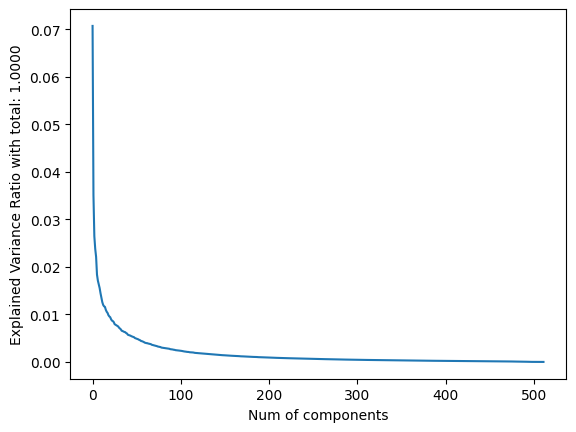

In [36]:
plot_explained_variance_ratio(pca.explained_variance_ratio_)

In [ ]:
# palette = sns.color_palette("hls", len(compressed_ds_indices))
palette = sns.color_palette("tab10")


def plot_2d_components(transformed_points, ax=None, first_component=0, second_component=1):
    for phrase_type_idx, label in enumerate(("No Prefix", "a photo of a", "Learned")):
        start_pt_idx = phrase_type_idx * len(all_phrases)
        tp = transformed_points[start_pt_idx: start_pt_idx + len(all_phrases)]
        sns.scatterplot(
                x=tp[:, first_component],
                y=tp[:, second_component],
                label=label,
                linewidth=0.1,
                ax=ax
            )
        # for (label, (min_idx, max_idx)), color in zip(compressed_ds_indices.items(), palette):
        #     sns.scatterplot(
        #         x=tp[min_idx: max_idx, first_component],
        #         y=tp[min_idx: max_idx, second_component],
        #         label=label,
        #         linewidth=0.1,
        #         color=color,
        #         ax=ax
        #     )
    
    # xlabel = f"Principal component: {first_component}"
    # ylabel = f"Principal component: {second_component}"
    # if ax is None:
    #     plt.xlabel(xlabel)
    #     plt.ylabel(ylabel)
    # else:
    #     ax.set_xlabel(xlabel)
    #     ax.set_ylabel(ylabel)

def plot_principal_components(transformed_points, n_rows=2, n_cols=3, figsize=(9, 6), legend_loc="center left"):
    if n_rows == 1 and n_cols == 1:
        plot_2d_components(transformed_points)
    else:
        fig, axes = plt.subplots(n_rows, n_cols, figsize=figsize)

        for i, ax in enumerate(axes.flatten()):
            plot_2d_components(transformed_points, ax, first_component=i, second_component=i + 1)
    plt.axis('off')
    # plt.legend(bbox_to_anchor=(1, 0.5), loc=legend_loc)
    plt.legend()
    plt.tight_layout()

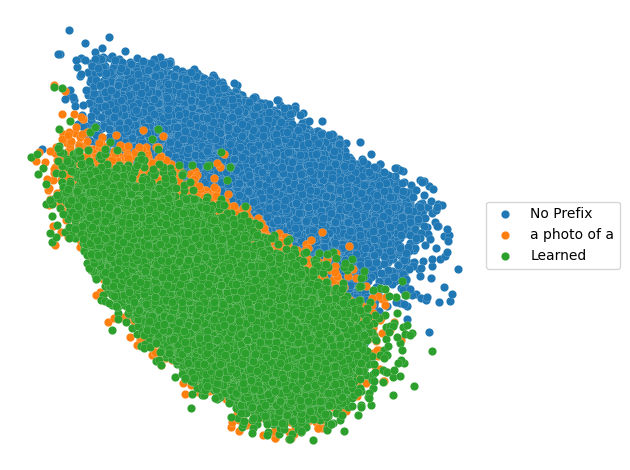

In [38]:
plot_principal_components(pca_transformed, 1, 1)

In [39]:
import gc

torch.cuda.empty_cache()
gc.collect()

4318

In [40]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis()
lda_transformed = lda.fit_transform(all_embeds, (0,)*len(all_phrases) + (1,)*len(all_phrases) + (2,)*len(all_phrases)) 
lda_transformed.shape

(240168, 2)

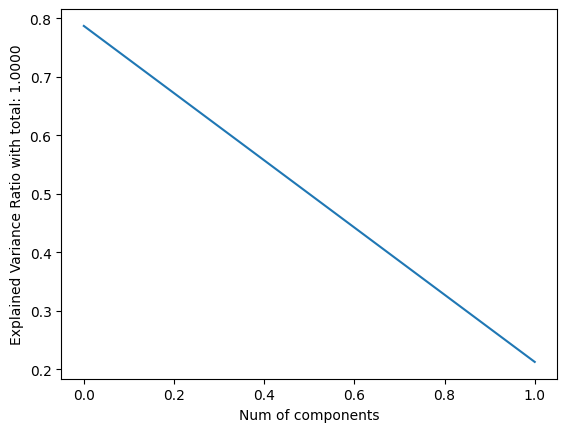

In [41]:
plot_explained_variance_ratio(lda.explained_variance_ratio_)

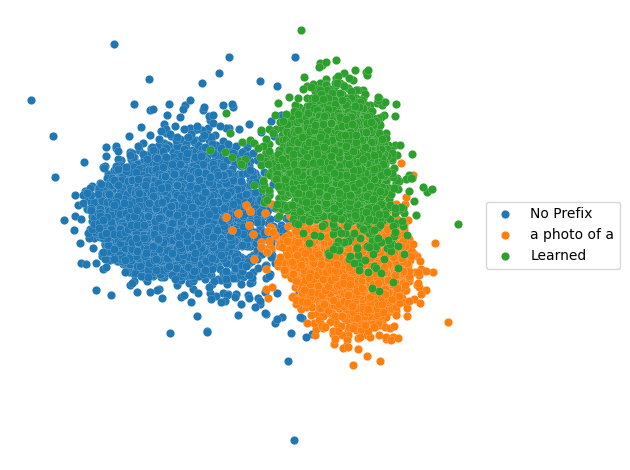

In [49]:
plot_principal_components(lda_transformed, 1, 1)

In [43]:
import gc

torch.cuda.empty_cache()
gc.collect()

5160

In [44]:
# compressed_ds_indices

In [45]:
# max(map(len, compressed_ds_indices))

In [46]:
# labels = np.empty(len(all_embeds), dtype="<U17")

# for ds_name, (min_idx, max_idx) in compressed_ds_indices.items():
#     labels[min_idx: max_idx] = ds_name

In [47]:
import gc

torch.cuda.empty_cache()
gc.collect()

4095

In [67]:
tsne = TSNE(n_components=2, perplexity=50, n_jobs=-1)
tsne_transformed = tsne.fit_transform(all_embeds)
tsne_transformed.shape, tsne.kl_divergence_

((240168, 2), 2.479807138442993)

In [68]:
tsne_transformed_variance = tsne_transformed.var(axis=0)
tsne_transformed_variance

array([3286.2393, 3221.1758], dtype=float32)

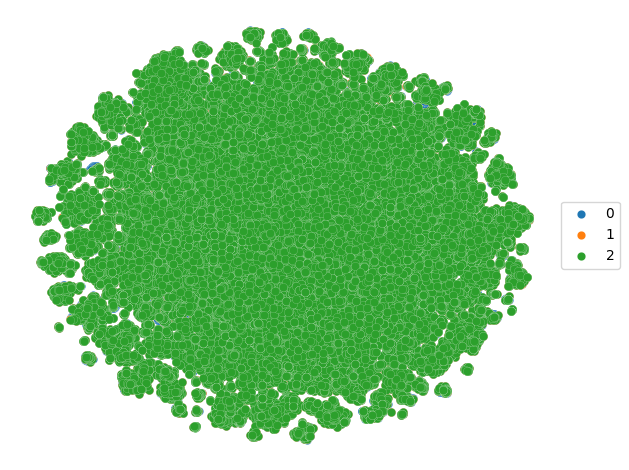

In [69]:
plot_principal_components(tsne_transformed, 1, 1)

In [50]:
pca_tsne = TSNE(n_components=2, perplexity=50, n_jobs=-1)
pca_tsne_transformed = pca_tsne.fit_transform(pca_transformed[:, :100])
pca_tsne_transformed.shape, pca_tsne.kl_divergence_

((240168, 2), 2.491946220397949)

In [51]:
pca_tsne_transformed_variance = pca_tsne_transformed.var(axis=0)
pca_tsne_transformed_variance

array([3375.2964, 3250.0286], dtype=float32)

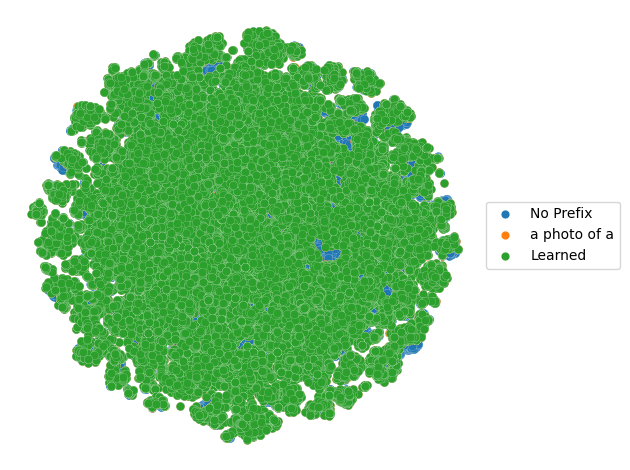

In [52]:
plot_principal_components(pca_tsne_transformed, 1, 1)